In [1]:
from experiments.plots.util import *

In [2]:
NODES = 5
FILTER_PROV = False
PROV_ONLY = True

assert not (FILTER_PROV and PROV_ONLY)

if NODES == 1:
    ROOT_LOG_DIR = f'/Users/nils/downloads/normal'
else:
    ROOT_LOG_DIR = f'/Users/nils/downloads/dist-{NODES}'

VERSION = 'version'
FINE_TUNED = 'fine-tuned'
OUTDOOR = 'outdoor'
FOOD = 'food'


def get_times():
    # %%
    # get all file sin the directory
    all_files = all_files_in_dir(ROOT_LOG_DIR)
    if FILTER_PROV:
        all_files = [f for f in all_files if not 'provenance' in f]
    elif PROV_ONLY:
        all_files = [f for f in all_files if 'provenance' in f]
    node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
    # for all files extract the metadata (e.g. what model and dataset is used)
    U_IDS = 'u_ids'
    files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
    # add a mapping: use_case -> model id
    files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
    # add the parsed events
    files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]
    # %%
    valid_joined = join_server_and_node_meta(files_and_meta)
    # %%
    times = extract_times(valid_joined, num_nodes=NODES, high_level_only=True)

    return times

In [3]:
times = get_times()

In [6]:
def to_s(values):
    return np.array(list(values)) * 10**-9

def plot_compare_times(baseline, param_update, provenance, save_path=None, ignore_use_cases=[], y_min_max=None):
    print('B: {}'.format(baseline))
    print('P_U: {}'.format(param_update))
    print('M_Prov: {}'.format(provenance))
    if ignore_use_cases:
        for u in ignore_use_cases:
            if u in baseline:
                del baseline[u]
            if u in param_update:
                del param_update[u]
            if u in provenance:
                del provenance[u]

    matplotlib.rcParams.update({'font.size': 24})
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    x_labels = [k.replace('_', '-') for k in baseline.keys()]
    ind = np.arange(len(x_labels))  # the x locations for the groups
    width = 0.3  # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, to_s(baseline.values()), width, color=A_RED)
    rects2 = ax.bar(ind + width, to_s(param_update.values()), width, color=A_YELLOW)
    rects3 = ax.bar(ind + 2 * width, to_s(provenance.values()), width, color=A_BLUE)
    ax.set_ylabel('Time in seconds')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    # ax.legend((rects1[0], rects2[0], rects3[0]), ('B', 'U_p', 'M_prov'),
    #           bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
    ax.set_xlabel('Use case')

    plt.xticks(rotation=90)

    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()

B: {'U_1': 118408092.0, 'U_2': 110519238.0, 'U_3_1_1': 116922156.0, 'U_3_1_2': 104871928.0, 'U_3_1_3': 110656217.0, 'U_3_1_4': 108543879.0, 'U_3_2_1': 113886749.0, 'U_3_2_2': 108073548.0, 'U_3_2_3': 110281575.0, 'U_3_2_4': 108391559.0}
P_U: {'U_1': 124732258.5, 'U_2': 113656050.0, 'U_3_1_1': 135245867.0, 'U_3_1_2': 93971896.5, 'U_3_1_3': 99474641.5, 'U_3_1_4': 96403789.0, 'U_3_2_1': 108170054.5, 'U_3_2_2': 109227954.5, 'U_3_2_3': 100610623.0, 'U_3_2_4': 98900517.5}
M_Prov: {'U_1': 104217108.0, 'U_2': 919835067.0, 'U_3_1_1': 461571157.5, 'U_3_1_2': 445156053.5, 'U_3_1_3': 410317856.0, 'U_3_1_4': 438460266.5, 'U_3_2_1': 480562904.0, 'U_3_2_2': 418619337.0, 'U_3_2_3': 407410879.5, 'U_3_2_4': 414682744.0}


<Figure size 576x432 with 0 Axes>

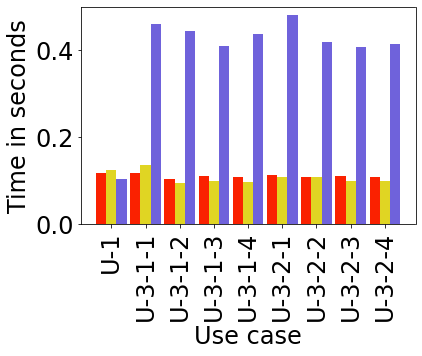